In [ ]:
# default_exp integer
#hide
from nbdev.showdoc import *
from fastcore.test import *

# Integer Sequences

![Counting Frame](img/abacus.jpeg)

## Agenda

* We use [list comprehensions](https://en.wikipedia.org/wiki/List_comprehension) to create sequences in _Python_.
* An online-datbase can be used to search for integer sequences.
* We can use the `matplotlib` library to visualize sequences.

## Natural Numbers

### Recursive Definition

$$
\begin{align*}
0&=\{\} \\
n+1&=n \cup \{ n \} \\
\end{align*}
$$

### Examples

$$
\begin{align*}
0&=\{\}&&{}=\emptyset ,\\
1&=\{0\}&&{}=\{\emptyset \},\\
2&=\{0,1\}&&{}=\{\emptyset ,\{\emptyset \}\},\\
3&=\{0,1,2\}&&{}=\{\emptyset ,\{\emptyset \},\{\emptyset ,\{\emptyset \}\}\}. \\
\end{align*}
$$

## What is an Integer Sequence?

### Examples
#### (a)
The sequence of the square numbers from $ 0 $ to $ 19 $:

In [ ]:
[ n ** 2 for n in range(20) ]

[0,
 1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361]

We can plot this sequence with:

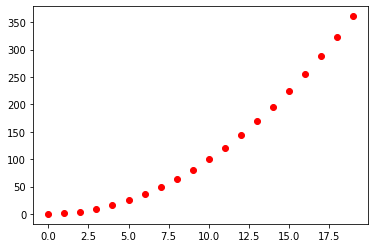

In [ ]:
import matplotlib.pyplot as plt
domain = range(20)
plt.plot(domain, [n**2 for n in domain], 'ro')
plt.show()

#### (b)
The odd integers:

In [ ]:
[ 2*n + 1 for n in range(20) ]

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

Or then:

In [ ]:
[ n for n in range(1, 40, 2) ]

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

### Exercises
#### (a)
The triangular numbers: 0, 1, 3, 6, 10, 15, …
Can you find a formula for the first 20 elements of this sequence?

#### (b)
The centerend hexagon numbers: 1, 7, 19, 37, 61, 91, …
Can you find a formula for the first 20 elements of this sequence?

#### (c)
What is the relation between these two formulas?
Maybe this picture can help?

![Centered Hexagon](img/centered-hexagonal.png)

#### (d)
Compare the differences of the square numbers with the difference of the triangular numbers. What we mean with this is compare:
$$
\{ 1-0, 4-1, 9-4, 16-9, … \}
$$
to
$$
\{ 1-0, 3-1, 6-3, 10-6, …\}
$$
How can you get from one to the other?

#### (e)
Compare the sequence of square numbers with the sequence of the triangular numbers. How can you get from on to the other?

## Definition of an Integer Sequence
An _integer sequence_ is a mapping that assigns each natural number $ n \in \mathbb{N} $ an integer value $ f(n) \in \mathbb{Z} $.
In other words it is a function:
 
$$
\begin{matrix}
f: \mathbb{N} \rightarrow \mathbb{Z} \\
n \mapsto f(n)
\end{matrix}
$$
 
### Remark
In computer science we usually start the index range with $ 0 $.

### Java
In _Java_ we can either use an array of `int`:
```java
int[] f;
```

Or then a `List` of `Integer`:
```java
List<Integer> f;
```

### Python
In _Python_ we can use an ad-hoc list, a list comprehension or the `list` class:

In [ ]:
a = [2, 3, 5, 7, 11, 13]
b = [n ** 3 for n in range(10)]
c = list(range(10))
a, b, c

([2, 3, 5, 7, 11, 13],
 [0, 1, 8, 27, 64, 125, 216, 343, 512, 729],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Notation
Instead of $ f(n) $ we will often see the index $ n $ as a subscript of the sequence $ f $: $ f_{n} $

### Example
$$
f_{n} = n^3
$$

### Python
Also in _Python_ programs brackets `[]` are used instead of parentheses `()`:

In [ ]:
f = [n ** 3 for n in range(10)]
f[7]

343

Of course we can also define $ f $ as ordinary function:

In [ ]:
def f(n):
    return n ** 3
f(7)

343

Or alternatively using $ \lambda $ notation:

In [ ]:
f = lambda n: n ** 3
f(7)

343

## Candles on a Birthday Cake

How old are you if you can arrange the candles on your birthday cake in both a square and an equilateral triangle?

In [ ]:
m = n = 0
dm = dn = 1
for k in range(10000000):
    if m == n:
        print(m)
    if m < n:
        m += dm
        dm += 2
    else:
        n += dn
        dn += 1

0
1
36
1225
41616
1413721
48024900
1631432881
55420693056
1882672131025


We can search with this result to find [numbers that are both triangular and square.](https://oeis.org/A001110)
From here we can find a recursive formula to calculate the first couple of values:
$$
\begin{matrix}
a_{0} = 0 \\
a_{1} = 1 \\
\end{matrix}
$$
For $ n \geqslant 2 $:
$$
a_{n} = 34 * a_{n-1} - a_{n-2} + 2
$$

In [ ]:
a, b = 0, 1
for k in range(20):
    a, b = b, 34 * b - a + 2
    print(b)

36
1225
41616
1413721
48024900
1631432881
55420693056
1882672131025
63955431761796
2172602007770041
73804512832419600
2507180834294496361
85170343853180456676
2893284510173841030625
98286503002057414584576
3338847817559778254844961
113422539294030403250144100
3853027488179473932250054441
130889512058808083293251706896
4446390382511295358038307980025


Apparently this is much faster.

## Operations

Given two sequences $ f_{n} $ and $ g_{n} $ we can add, subtract or multiply them to create a new sequence:
$$
h_{n} = f_{n} + g_{n}
$$

However we can not divide sequences since the result may not be in $ \mathbb{Z} $ anymore.

### Constant Sequences

We can consider constants like $ 34 $ or $ 2 $ constant sequences:
$$
f_{n} = c
$$

But in general we just use them as constants.

### Transformations

These operations allows to define a function $ f $ on the elements  $ a_{n} $ of a sequence $ a $:

$$
\begin{matrix}
f: \mathbb{Z} \rightarrow \mathbb{Z} \\
a_{n} \mapsto f(a_{n})
\end{matrix}
$$

#### Example

Let's start with the sequence of odd numbers:

$$
a_{n} = 2n + 1
$$

We can apply the square function $ f(x) = x^2 $ to this sequence to get:

$$
b_{n} = f(a_{n}) = f(2n + 1) = (2n + 1)^2 = 4n^2 + 4n + 1
$$

This gives us the list of odd square numbers:

In [ ]:
[4 * n ** 2 + 4 * n + 1 for n in range(20)]

[1,
 9,
 25,
 49,
 81,
 121,
 169,
 225,
 289,
 361,
 441,
 529,
 625,
 729,
 841,
 961,
 1089,
 1225,
 1369,
 1521]

Of course we could use the definition of the function $ f(x) = x^2 $ instead:

In [ ]:
f = lambda x: x ** 2
[f(2 * n + 1) for n in range(20)]

[1,
 9,
 25,
 49,
 81,
 121,
 169,
 225,
 289,
 361,
 441,
 529,
 625,
 729,
 841,
 961,
 1089,
 1225,
 1369,
 1521]

We can lift a function $ f: \mathbb{Z} \rightarrow \mathbb{Z} $ to a function that operates on sequences:

$$
\begin{matrix}
f: \mathbb{Z}^{\mathbb{N}} \rightarrow \mathbb{Z}^{\mathbb{N}} \\
a \mapsto f(a)
\end{matrix}
$$

In mathematics this difference is often ignored.
But in programming languages we have to consider the difference of types.
Otherwise we get a type error:

```python
TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'
```

In case of _Python_ we can use the `map` function to map $ f $ over all elements of the sequence $ a $.
Since it returns a _generator_ we use `list` to get all the elements:

In [ ]:
f = lambda x: x ** 2
a = [2 * n + 1 for n in range(20)]
# f(a) <--- this doesn't work
list(map(f, a))

[1,
 9,
 25,
 49,
 81,
 121,
 169,
 225,
 289,
 361,
 441,
 529,
 625,
 729,
 841,
 961,
 1089,
 1225,
 1369,
 1521]

## Recursion

We can use previous elements of a sequence to define later elements.
This is what we already used in the example above.

![XKCD Functional Programming](img/xkcd-functional.png)

In general we have to define the first elements and then provide a formula to calculate the next element based on some of the previous ones.

### Factorial

This function $ ! $ is the product of the number with all the previous numbers but $ 0 $.

#### Example

$$
5! = 5 \cdot 4 \cdot 3 \cdot 2 \cdot 1
$$


#### Definition

Here's the recursive defintion of the factorial:

$$
\begin{matrix}
f(0) =& 1 \\
f(n) =& n \cdot f(n-1)
\end{matrix}
$$

Alternatively we could write:

$$
\begin{matrix}
0! =& 1 \\
n! =& n \cdot (n-1)!
\end{matrix}
$$

In [ ]:
def factorial(n):
    if n == 0:
        return 1
    return n * factorial(n - 1)

factorial(10)

3628800

### Fibonacci

We can also start with two values $ 0 $ and $ 1 $ and add them to get the next value:

$$
\begin{matrix}
f(0) = & 0 \\
f(1) = & 1 \\
f(n) = & f(n-1) + f(n-2)
\end{matrix}
$$

Alternatively we could write:

$$
\begin{matrix}
f_{0} = & 0 \\
f_{1} = & 1 \\
f_{n} = & f_{n-1} + f_{n-2}
\end{matrix}
$$

In [ ]:
def fibonacci(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fibonacci(n-1) + fibonacci(n-2)

fibonacci(10)

55

### Exercises
#### (a)
Calculate the first 20 factorials.

#### (b)
Calculate the first 20 elements of the fibonacci sequence.

## Summary

* An integer sequence is just a map of natural numbers to integers.
* You may call it list, array, vector, stream or function.
* We can add, subtract and multiply but in general not divide integer sequences.
* They may be defined explicitely as a function of the index.
* Or they may be defined recursively as a function of previous elements.
* We can use [The On-Line Encyclopedia of Integer Sequences® (OEIS®)](https://oeis.org/).

## References

* [Set-theoretic definition of natural numbers](https://en.wikipedia.org/wiki/Set-theoretic_definition_of_natural_numbers)